# Lab 1
DD2423 Image Analysis and Computer Vision 

## Exercise 1

### Exercise 1.3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d

from Functions import *
from gaussfft import gaussfft
from fftwave import fftwave

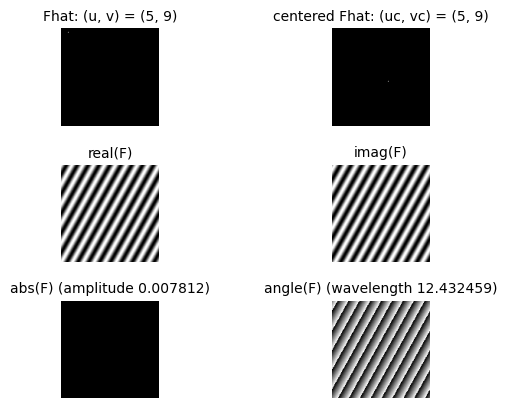

In [3]:
fftwave(5, 9)

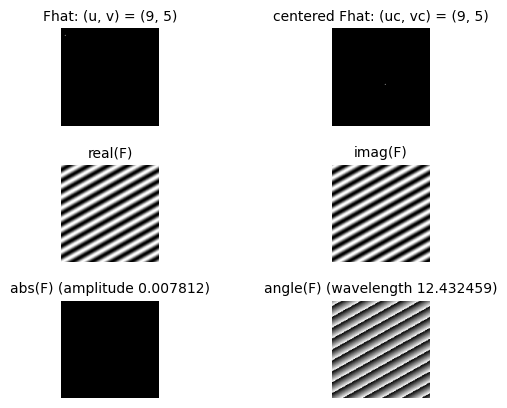

In [4]:
fftwave(9, 5)

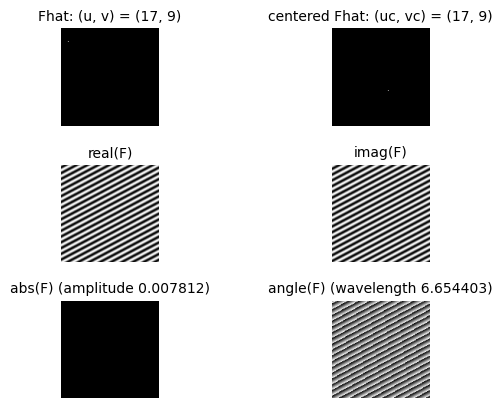

In [5]:
fftwave(17, 9)

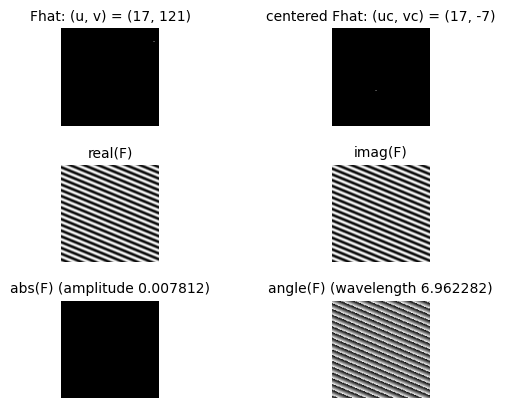

In [6]:
fftwave(17, 121)

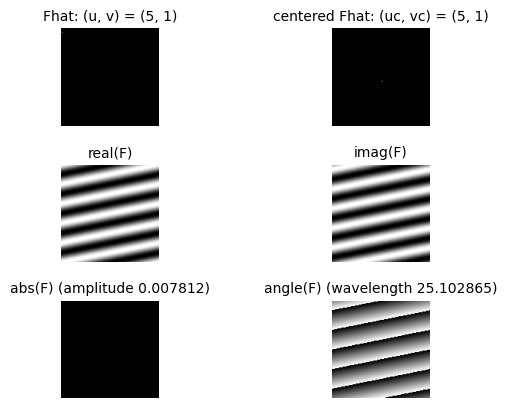

In [7]:
fftwave(5, 1)

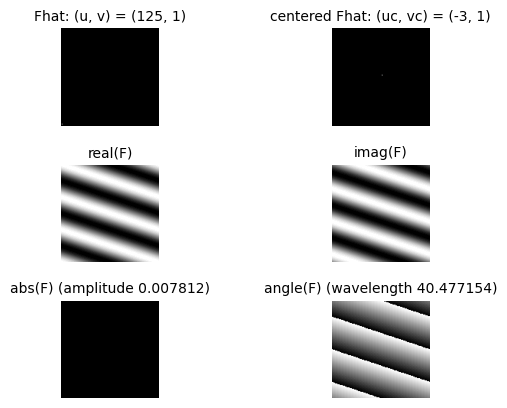

In [8]:
fftwave(125, 1)

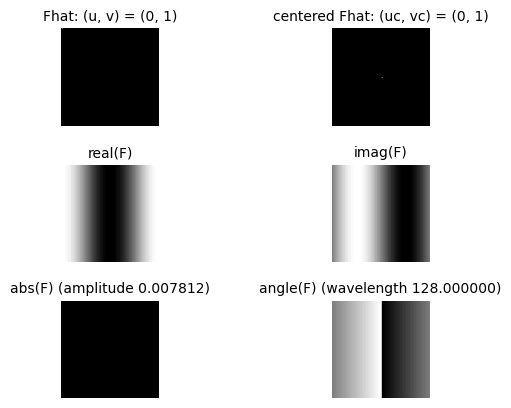

In [9]:
fftwave(0, 1)

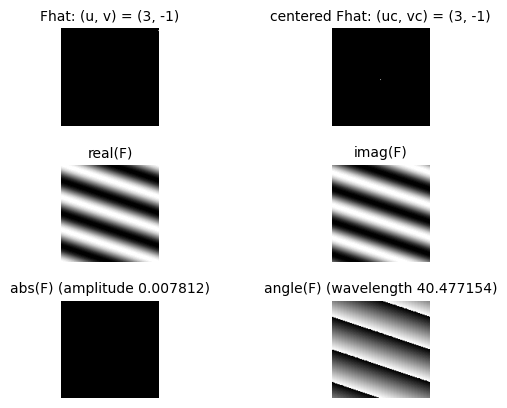

In [10]:
fftwave(3, -1)

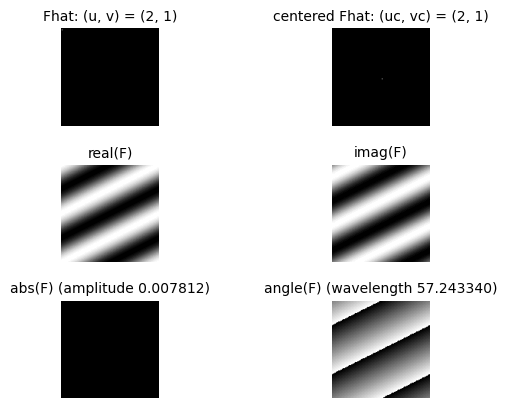

In [11]:
fftwave(2,1)

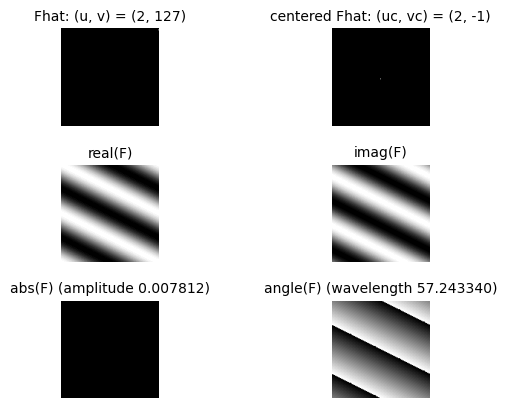

In [12]:
fftwave(2,127)

### Exercise 1.4

In [13]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T
H = F + 2*G

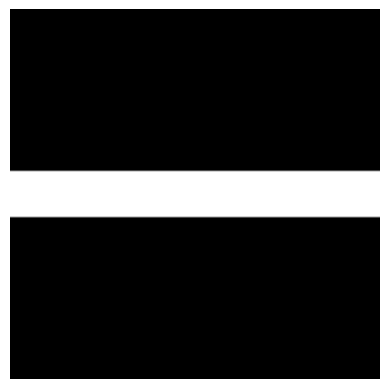

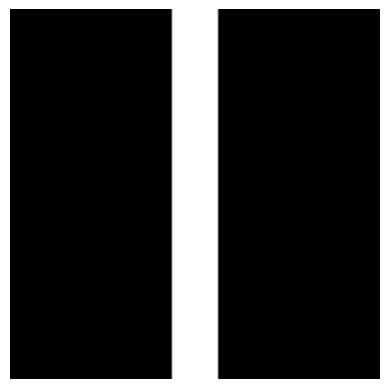

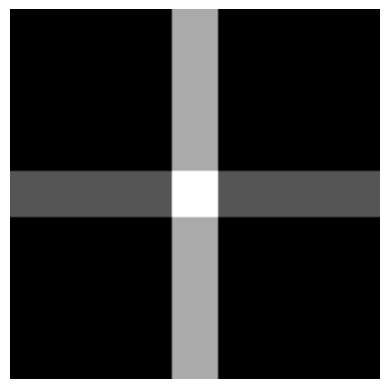

In [14]:
showgrey(F)
showgrey(G)
showgrey(H)

In [15]:
Fhat = fft2(F)
Ghat = fft2(G)
Hhat = fft2(H)

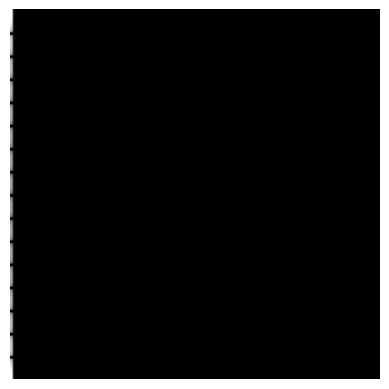

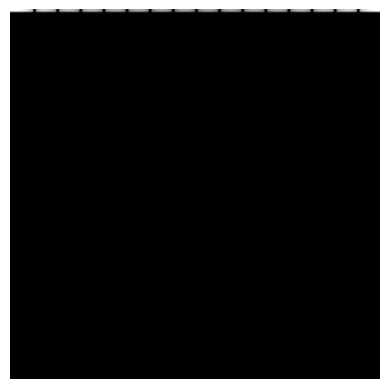

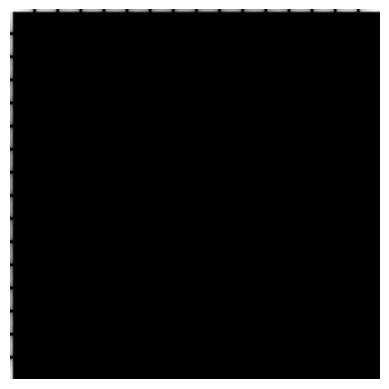

In [16]:
showgrey(np.log(1 + np.abs(Fhat)))
showgrey(np.log(1 + np.abs(Ghat)))
showgrey(np.log(1 + np.abs(Hhat)))

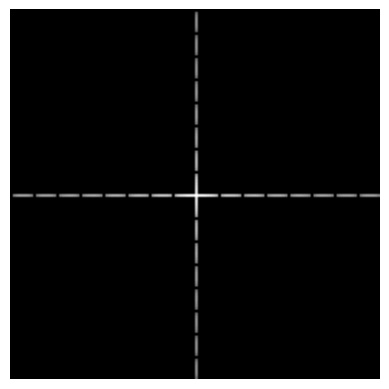

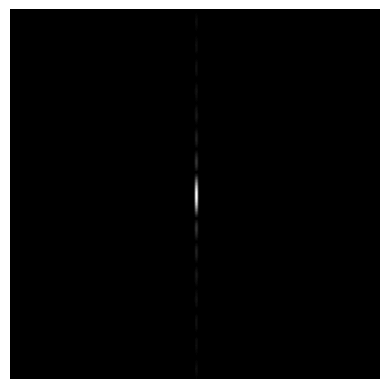

In [17]:
showgrey(np.log(1 + np.abs(fftshift(Hhat))))
showgrey(np.abs(fftshift(Fhat)))

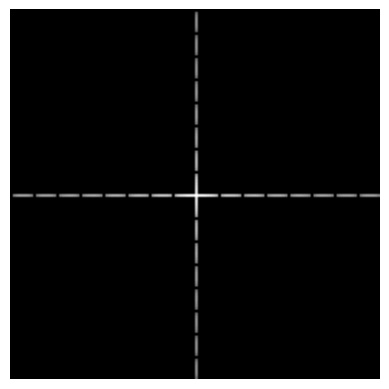

In [18]:
showfs(Hhat)

- fftshift is used so that the frequency domain is recentered around 0
- log is used so that lower coefficients (apparently exponentially decaying) are still visible.

### Exercise 1.5

In [19]:
F = np.concatenate([np.zeros((56,128)), np.ones((16,128)), np.zeros((56,128))])
G = F.T

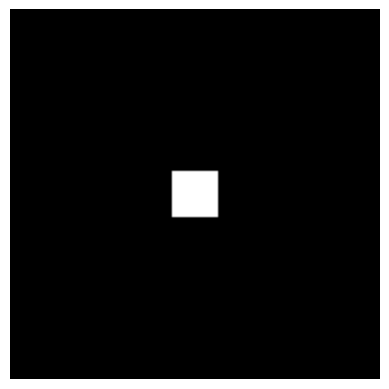

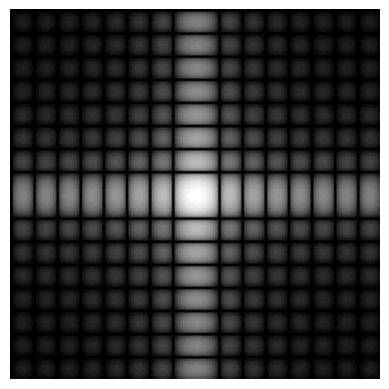

In [20]:
showgrey(F * G)
showfs(fft2(F * G))

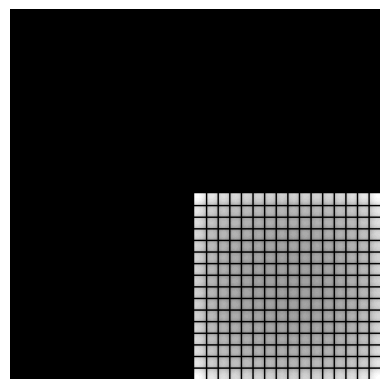

In [21]:
showfs((convolve2d((fft2(F)), (fft2(G)), 'full', 'fill')))

### Exercise 1.6 - Scaling

In [22]:
F = np.concatenate([np.zeros((60,128)), np.ones((8,128)), np.zeros((60,128))]) * \
    np.concatenate([np.zeros((128,48)), np.ones((128,32)), np.zeros((128,48))], axis=1)

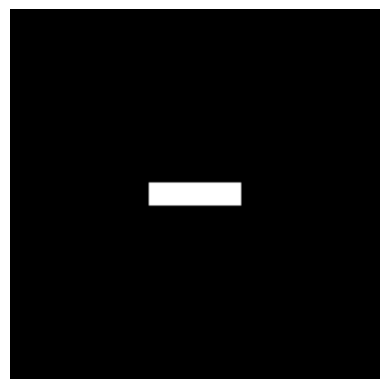

In [23]:
showgrey(F)

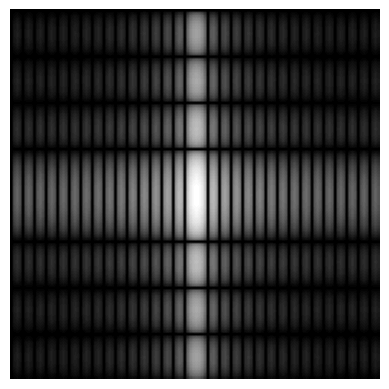

In [24]:
showfs(np.abs(fft2(F)))

### Exercise 1.7

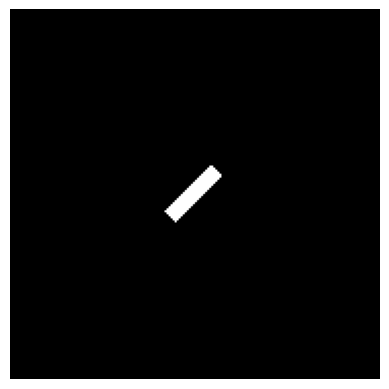

In [25]:
alpha = 45
G = rot(F, alpha)
showgrey(G)

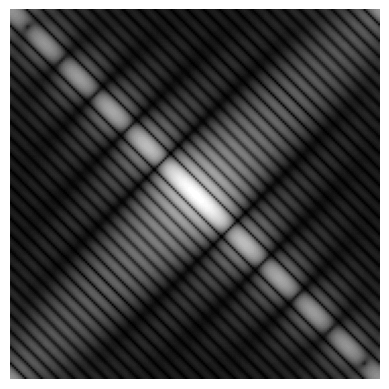

In [26]:
Ghat = fft2(G)
showfs(Ghat)

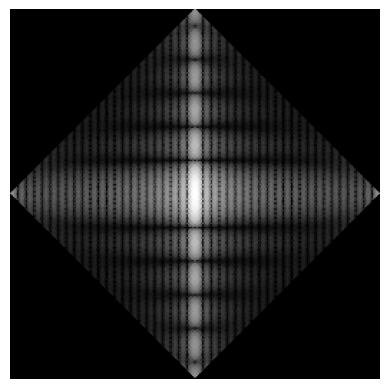

In [27]:
Hhat = rot(fftshift(Ghat), -alpha)
showgrey(np.log(1 + abs(Hhat)))

alpha =  30


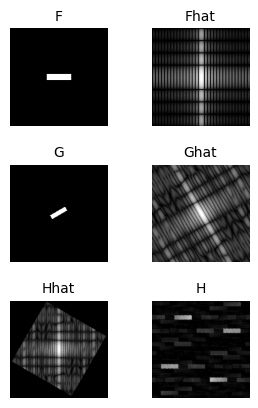

alpha =  45


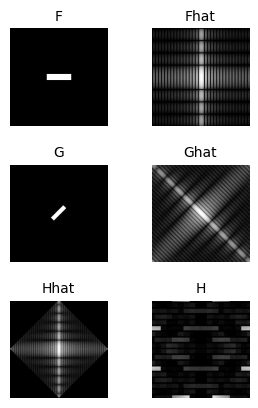

alpha =  60


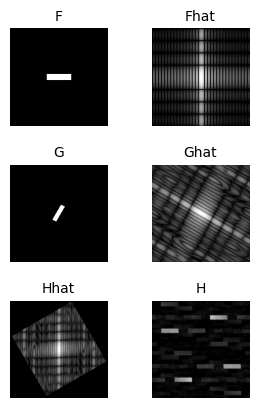

alpha =  90


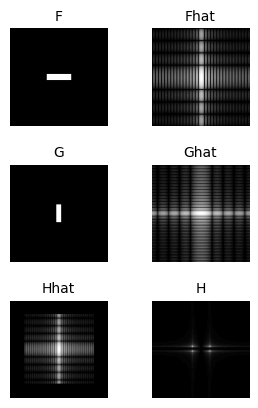

alpha =  135


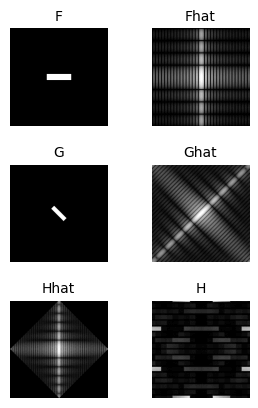

alpha =  180


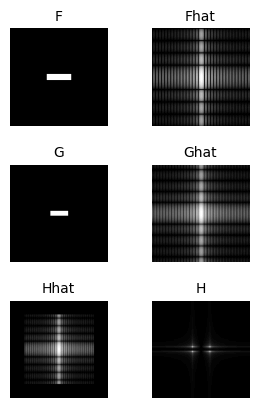

In [28]:
def fun(F, alpha):
    print("alpha = ", alpha)
    # temp = plt.clf()
    f = plt.figure()
    f.subplots_adjust(wspace=-.6, hspace=0.4)
    
    plt.rc('axes', titlesize=10)
    a1 = f.add_subplot(3, 2, 1)
    a1.set_title('F')
    showgrey(F, display=False)
    a2 = f.add_subplot(3, 2, 2)
    a2.set_title('Fhat')
    showfs(fft2(F), display=False)
    G = rot(F, alpha)
    a3 = f.add_subplot(3, 2, 3)
    a3.set_title('G')
    showgrey(G, display=False)
    a4 = f.add_subplot(3, 2, 4)
    a4.set_title('Ghat')
    Ghat = fft2(G)
    showfs(Ghat, display=False)
    Hhat = rot(fftshift(Ghat), -alpha)
    a5 = f.add_subplot(3, 2, 5)
    a5.set_title('Hhat')
    showgrey(np.log(1 + abs(Hhat)), display=False)
    H = ifft2(Hhat)
    a6 = f.add_subplot(3, 2, 6)
    a6.set_title('H')
    showgrey(np.abs(H), display)


for alpha in [30, 45, 60, 90, 135, 180]:
    fun(F, alpha)

### Exercise 1.8

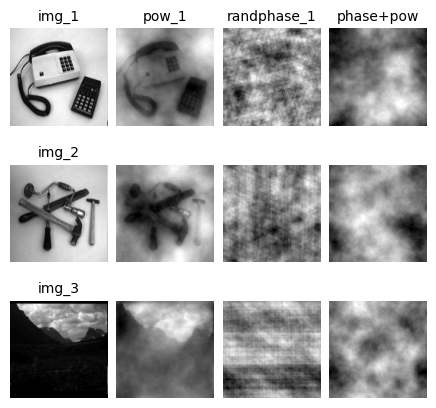

In [29]:
img_1 = np.load("Images-npy/phonecalc128.npy")
img_2 = np.load("Images-npy/few128.npy")
img_3 = np.load("Images-npy/nallo128.npy")

# Default second param a = 0.001
f = plt.figure()
f.subplots_adjust(wspace=-.4, hspace=0.4)
a = 0.001
pow_1 = pow2image(img_1, a)
pow_2 = pow2image(img_2, a)
pow_3 = pow2image(img_3, a)

a1 = f.add_subplot(3, 4, 1)
a1.set_title('img_1')
showgrey(img_1, display=False)
a2 = f.add_subplot(3, 4, 2)
a2.set_title('pow_1')
showgrey(pow_1, display=False)
a3 = f.add_subplot(3, 4, 3)
a3.set_title('randphase_1')
showgrey(randphaseimage(img_1), display=False)
a4 = f.add_subplot(3, 4, 4)
a4.set_title('phase+pow')
showgrey(randphaseimage(pow_1), display=False)

a5 = f.add_subplot(3, 4, 5)
a5.set_title('img_2')
showgrey(img_2, display=False)
a6 = f.add_subplot(3, 4, 6)
showgrey(pow_2, display=False)
a7 = f.add_subplot(3, 4, 7)
showgrey(randphaseimage(img_2), display=False)
a8 = f.add_subplot(3, 4, 8)
showgrey(randphaseimage(pow_2), display=False)

a9 = f.add_subplot(3, 4, 9)
a9.set_title('img_3')
showgrey(img_3, display=False)
a10 = f.add_subplot(3, 4, 10)
showgrey(pow_3, display=False)
a11 = f.add_subplot(3, 4, 11)
showgrey(randphaseimage(img_3), display=False)
a12 = f.add_subplot(3, 4, 12)
showgrey(randphaseimage(pow_3), display=False)

## Exericse 2

### Exercise 2.3

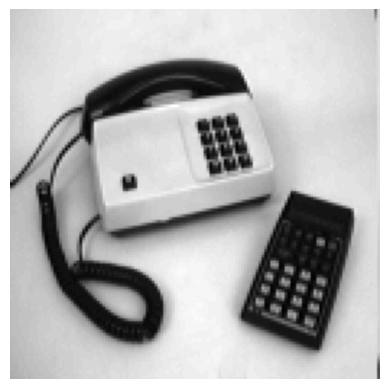

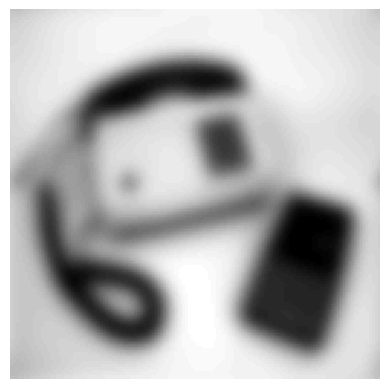

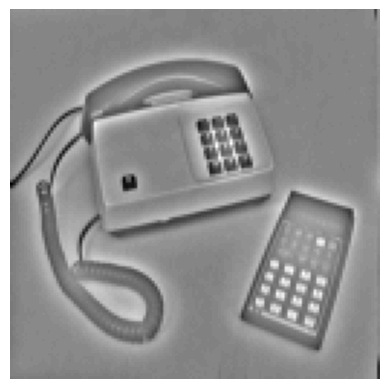

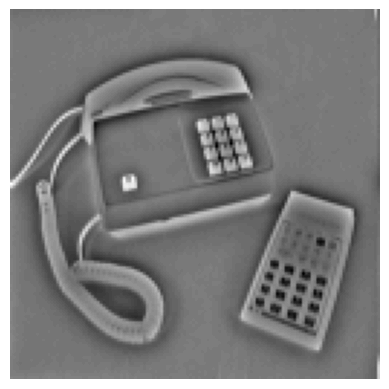

In [30]:
def gaussfft(pic, t):
    n, m = pic.shape
    mesh = np.meshgrid(np.arange(n), np.arange(m))
    # wrap around high frequencies
    mesh[0] = (mesh[0] >= n / 2) * (mesh[0] - n) + (mesh[0] < n / 2) * mesh[0]
    mesh[1] = (mesh[1] >= m / 2) * (mesh[1] - m) + (mesh[1] < m / 2) * mesh[1]
    gauss = np.exp(-(mesh[0]**2 + mesh[1]**2)/(2*t)) / (2*math.pi*t)
    # showgrey(gauss)
    gaussHat = fft2(gauss)
    # showfs(gaussHat)
    picHat = fft2(pic)
    # showfs(picHat)
    picHat_blurr = picHat * gaussHat
    # showfs(picHat_blurr)
    pic_blurr = np.real(ifft2(picHat_blurr))
    # showgrey(pic_blurr)
    return pic_blurr

pic = img_1
t = 10
pic_blurr = gaussfft(pic, t)
def normalized(pic):
    return (pic-np.min(pic))/(np.max(pic)-np.min(pic))

showgrey((pic))
showgrey((pic_blurr))
showgrey(normalized(pic) - normalized(pic_blurr))
showgrey(normalized(pic_blurr) - normalized(pic))

t =  0.1
variance = 
 [[0.0133 0.    ]
 [0.     0.0133]]


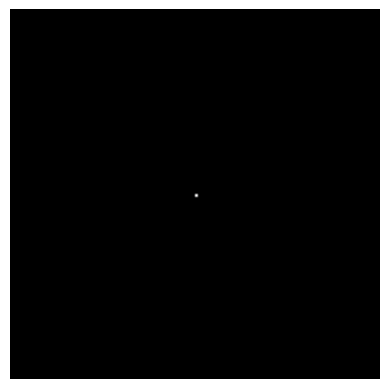


t =  0.3
variance = 
 [[ 0.28105 -0.     ]
 [-0.       0.28105]]


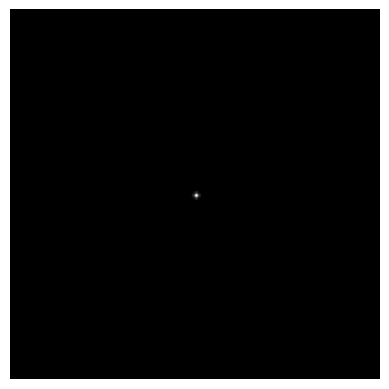


t =  1
variance = 
 [[ 1. -0.]
 [-0.  1.]]


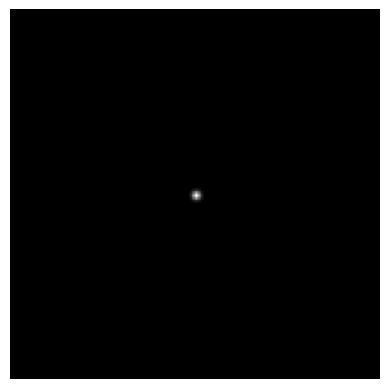


t =  10
variance = 
 [[10. -0.]
 [-0. 10.]]


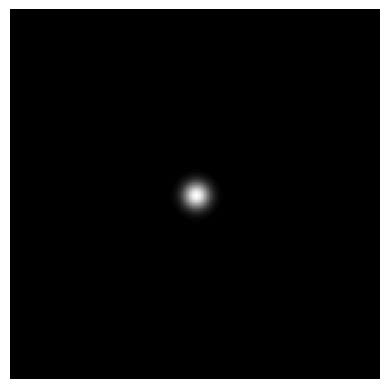


t =  100
variance = 
 [[100.  -0.]
 [ -0. 100.]]


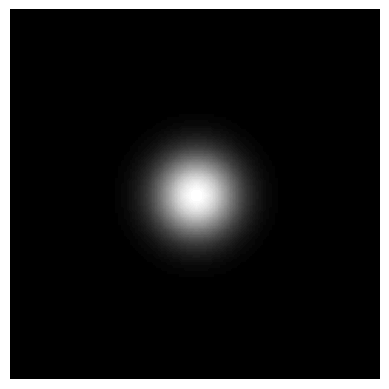

In [31]:
for i, t in enumerate((0.1,0.3,1,10,100)):
    print("t = ", t)
    psf = gaussfft(deltafcn(128, 128), t)
    # psf_given = discgaussfft(deltafcn(128, 128), t)
    var = variance(psf)
    # var_given = variance(psf_given)
    print("variance = \n", np.round(var,5))
    # print("variance given = \n", np.round(var_given,5))
    showgrey(psf)
    # showgrey(psf_given)
    print()
    

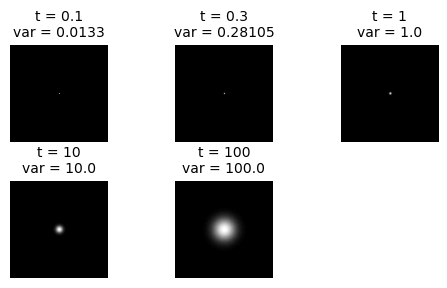

In [32]:
f = plt.figure()
f.subplots_adjust(wspace=0, hspace=0.4)
ts = (0.1,0.3,1,10,100)
axes = []
n = len(ts)
m = int(np.ceil(np.sqrt(n)))
for i, t in enumerate(ts):
    psf = gaussfft(deltafcn(128, 128), t)
    var = variance(psf)
    a = f.add_subplot(m, m, i+1)
    a.set_title('t = ' + str(t)+'\nvar = '+str(np.round(var.max(),5)))
    showgrey(psf, display=False)
    axes.append(a)

#### Q16

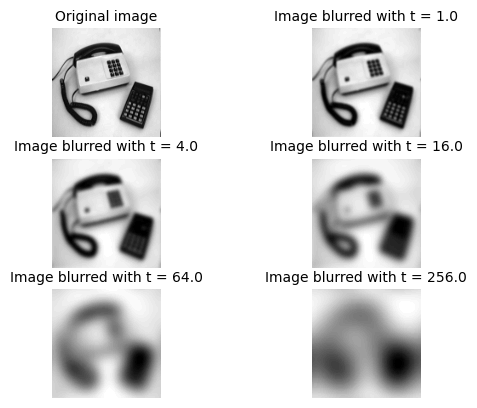

In [35]:
# CODE FOR SHOWING IMAGE BLURS
img = pic
f = plt.figure()
f.subplots_adjust(wspace=0.1, hspace=0.2)
plt.rc('axes', titlesize=10)

a1 = f.add_subplot(3, 2, 1)
showgrey(img, False)
a1.title.set_text("Original image")

a2 = f.add_subplot(3, 2, 2)
showgrey(gaussfft(img, 1.0), False)
a2.title.set_text("Image blurred with t = 1.0")

a3 = f.add_subplot(3, 2, 3)
showgrey(gaussfft(img, 4.0), False)
a3.title.set_text("Image blurred with t = 4.0")

a4 = f.add_subplot(3, 2, 4)
showgrey(gaussfft(img, 16.0), False)
a4.title.set_text("Image blurred with t = 16.0")

a5 = f.add_subplot(3, 2, 5)
showgrey(gaussfft(img, 64.0), False)
a5.title.set_text("Image blurred with t = 64.0")

a6 = f.add_subplot(3, 2, 6)
showgrey(gaussfft(img, 256.0), False)
a6.title.set_text("Image blurred with t = 256.0")

plt.show()

## Exercise 3

### Exercise 3.1

In [36]:
office = np.load("Images-npy/office256.npy")
add = office.copy()
add = gaussnoise(add, 16) # apparetly inplace
sap = office.copy()
sap = sapnoise(sap, 0.1, 255) # apparetly inplace

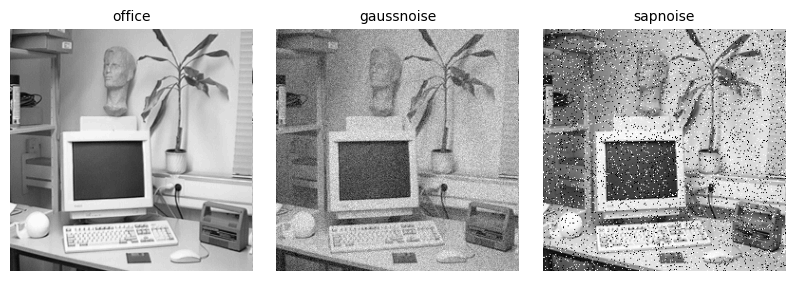

In [37]:
f = plt.figure()
f.set_size_inches(10, 10)
f.subplots_adjust(wspace=0.1, hspace=0)
a1 = f.add_subplot(1, 3, 1)
a1.set_title('office')
showgrey(office, display=False)
a2 = f.add_subplot(1, 3, 2)
a2.set_title('gaussnoise')
showgrey(add, display=False)
a3 = f.add_subplot(1, 3, 3)
a3.set_title('sapnoise')
showgrey(sap, display=False)

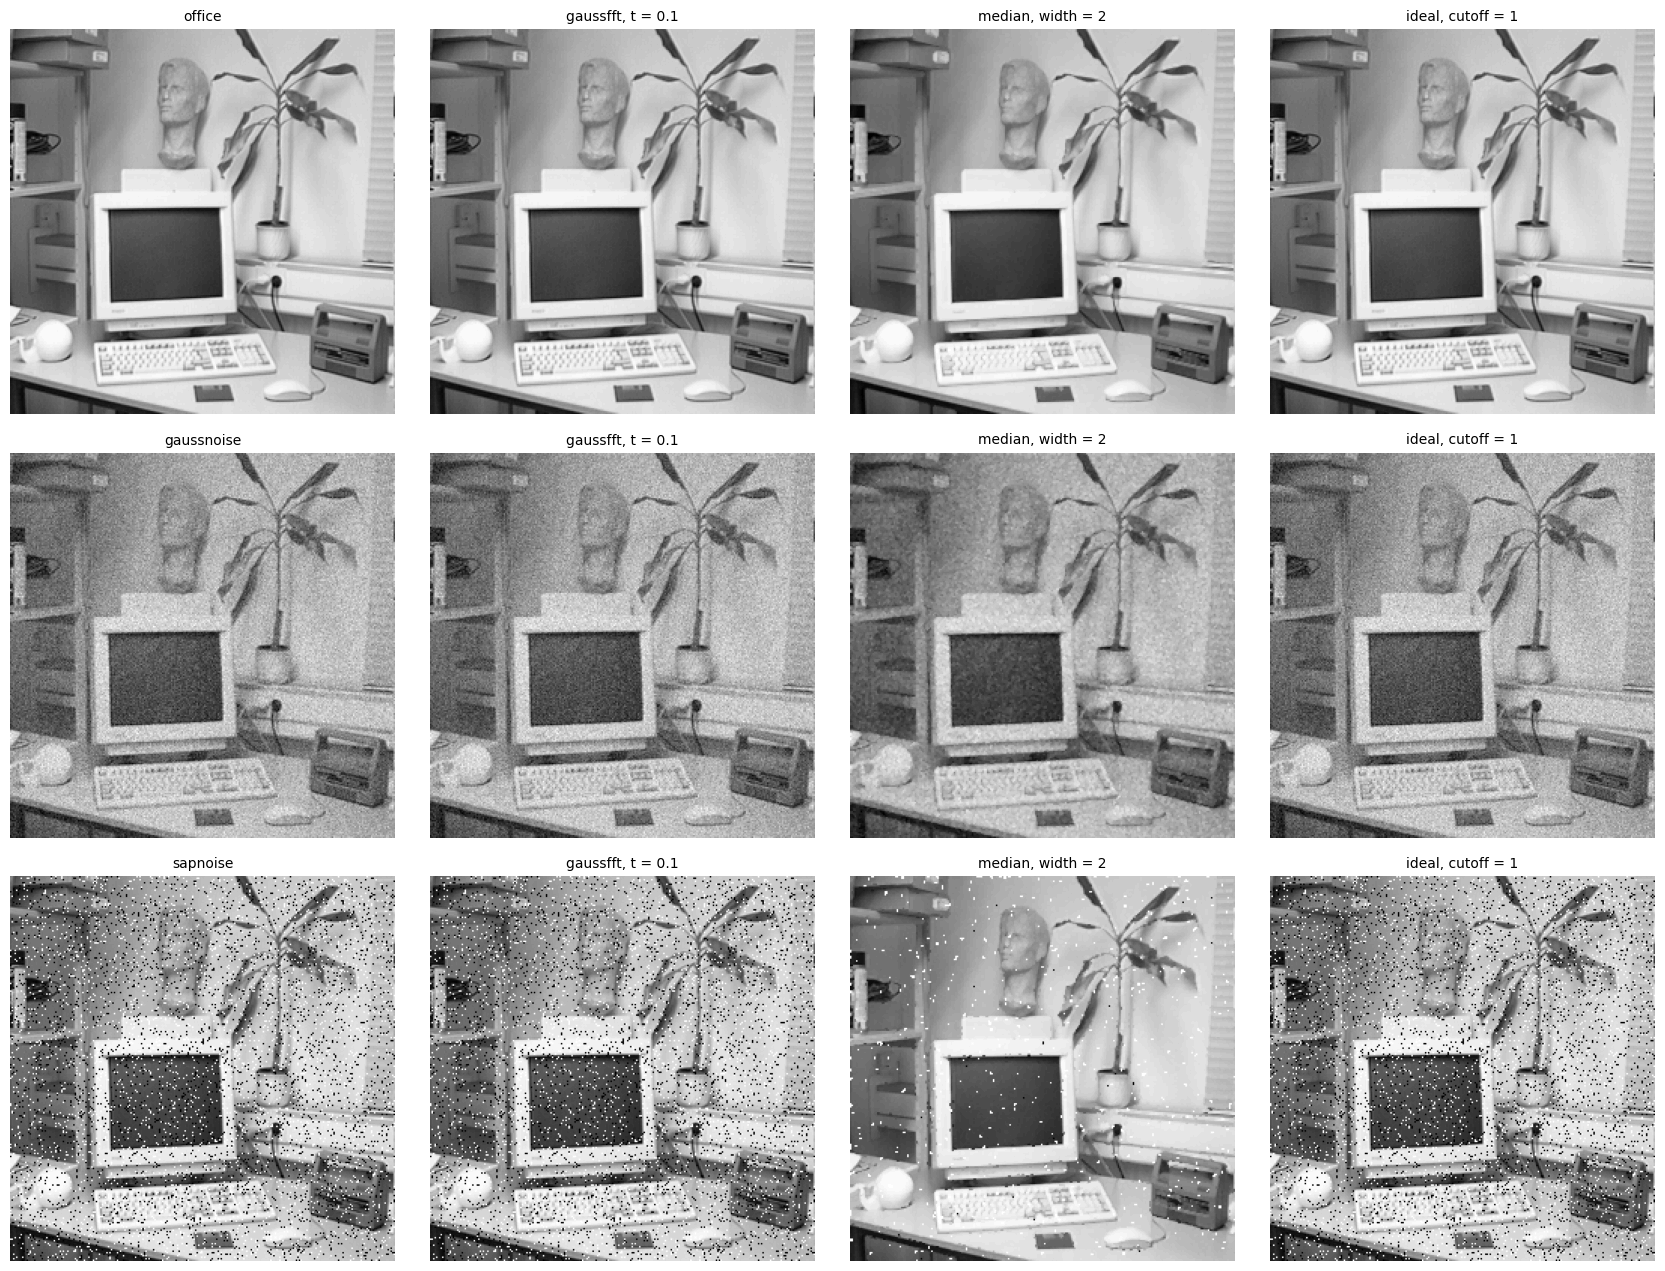

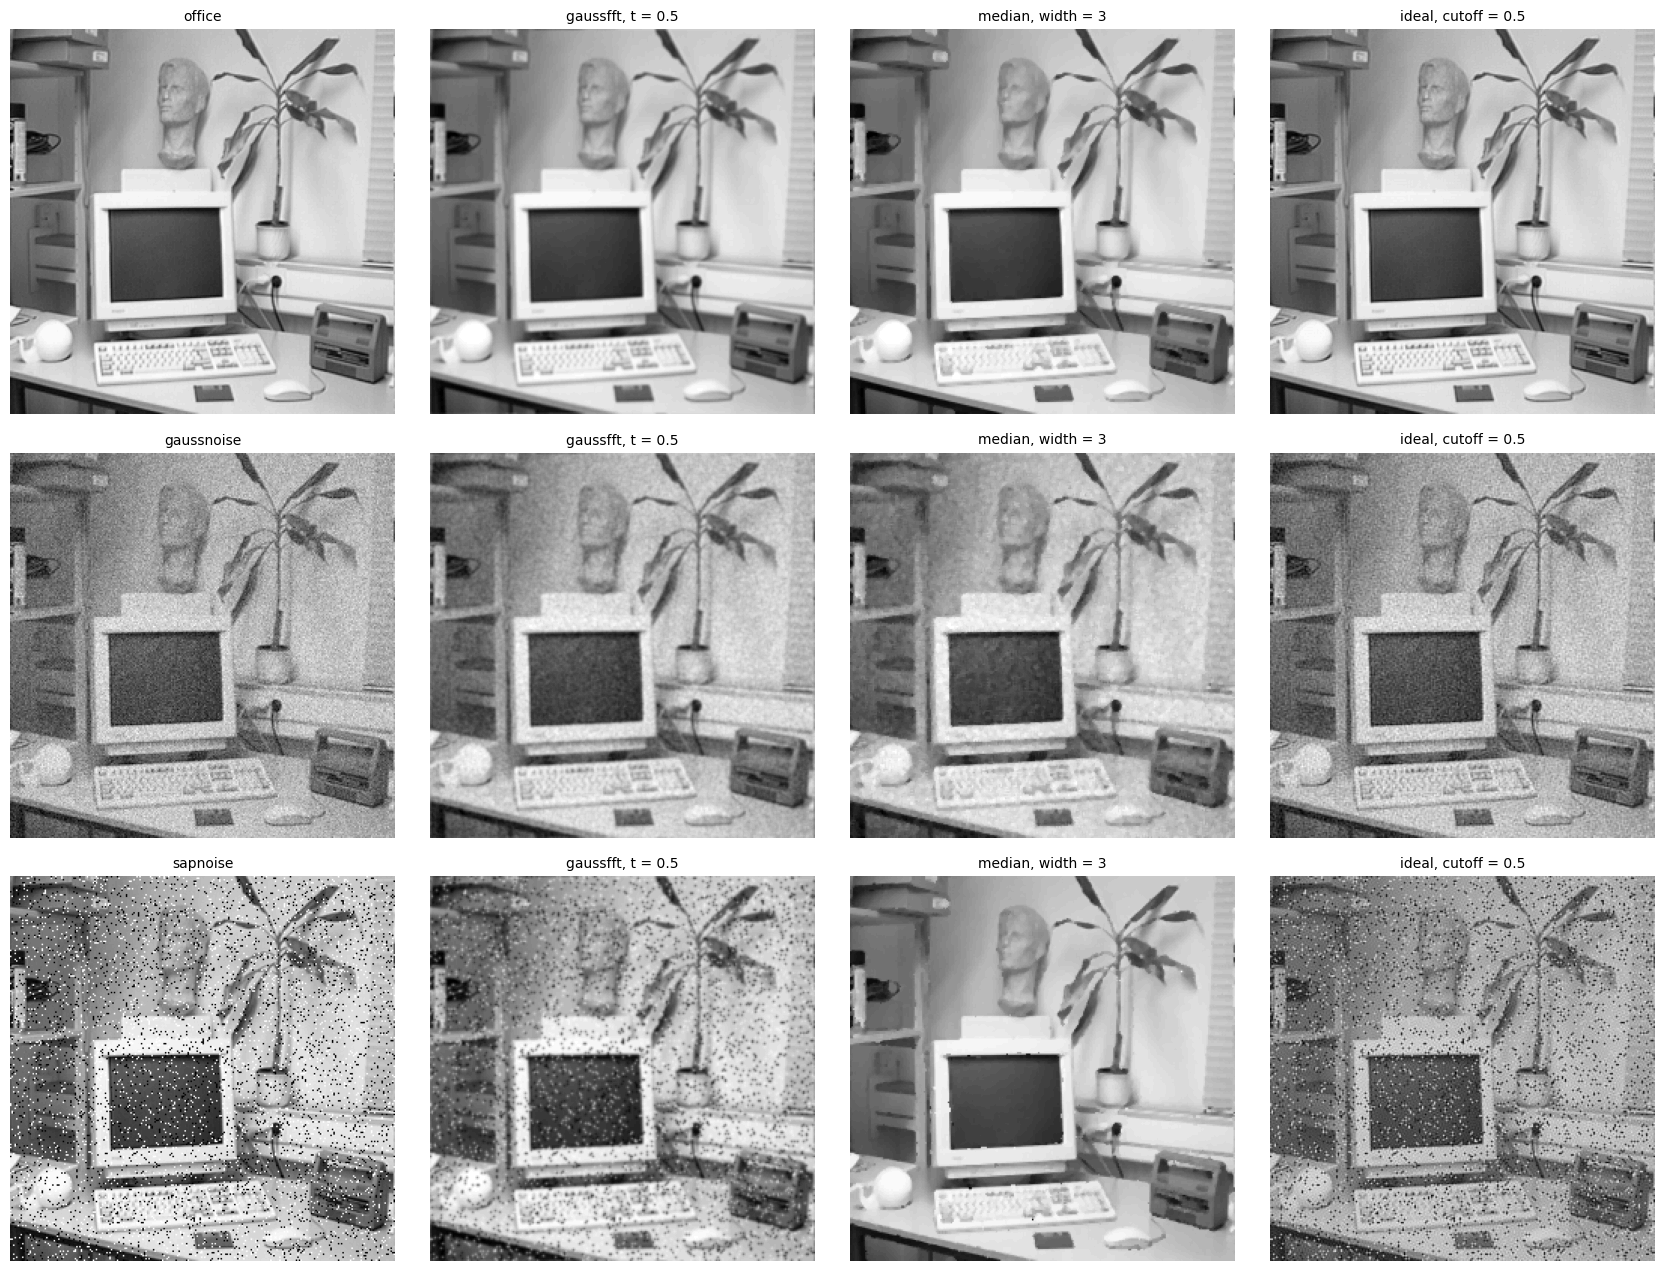

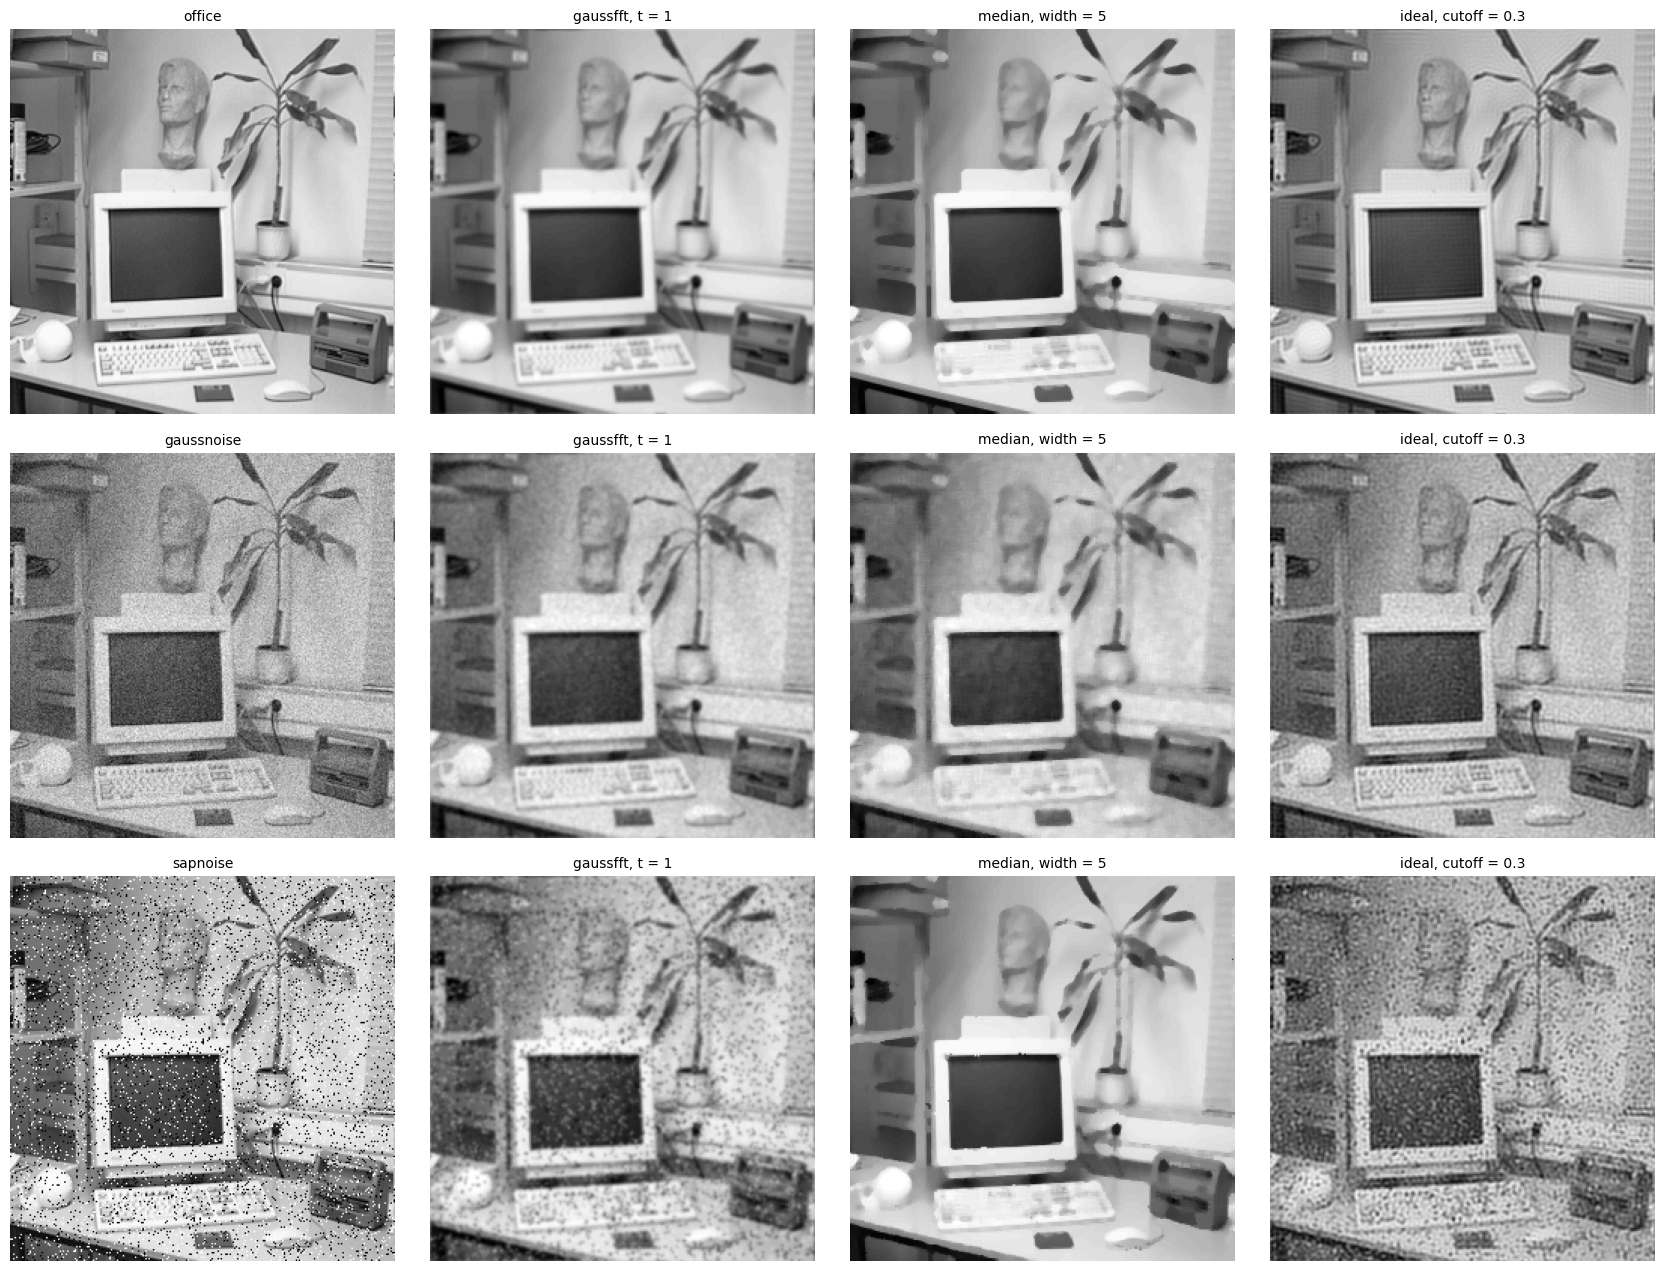

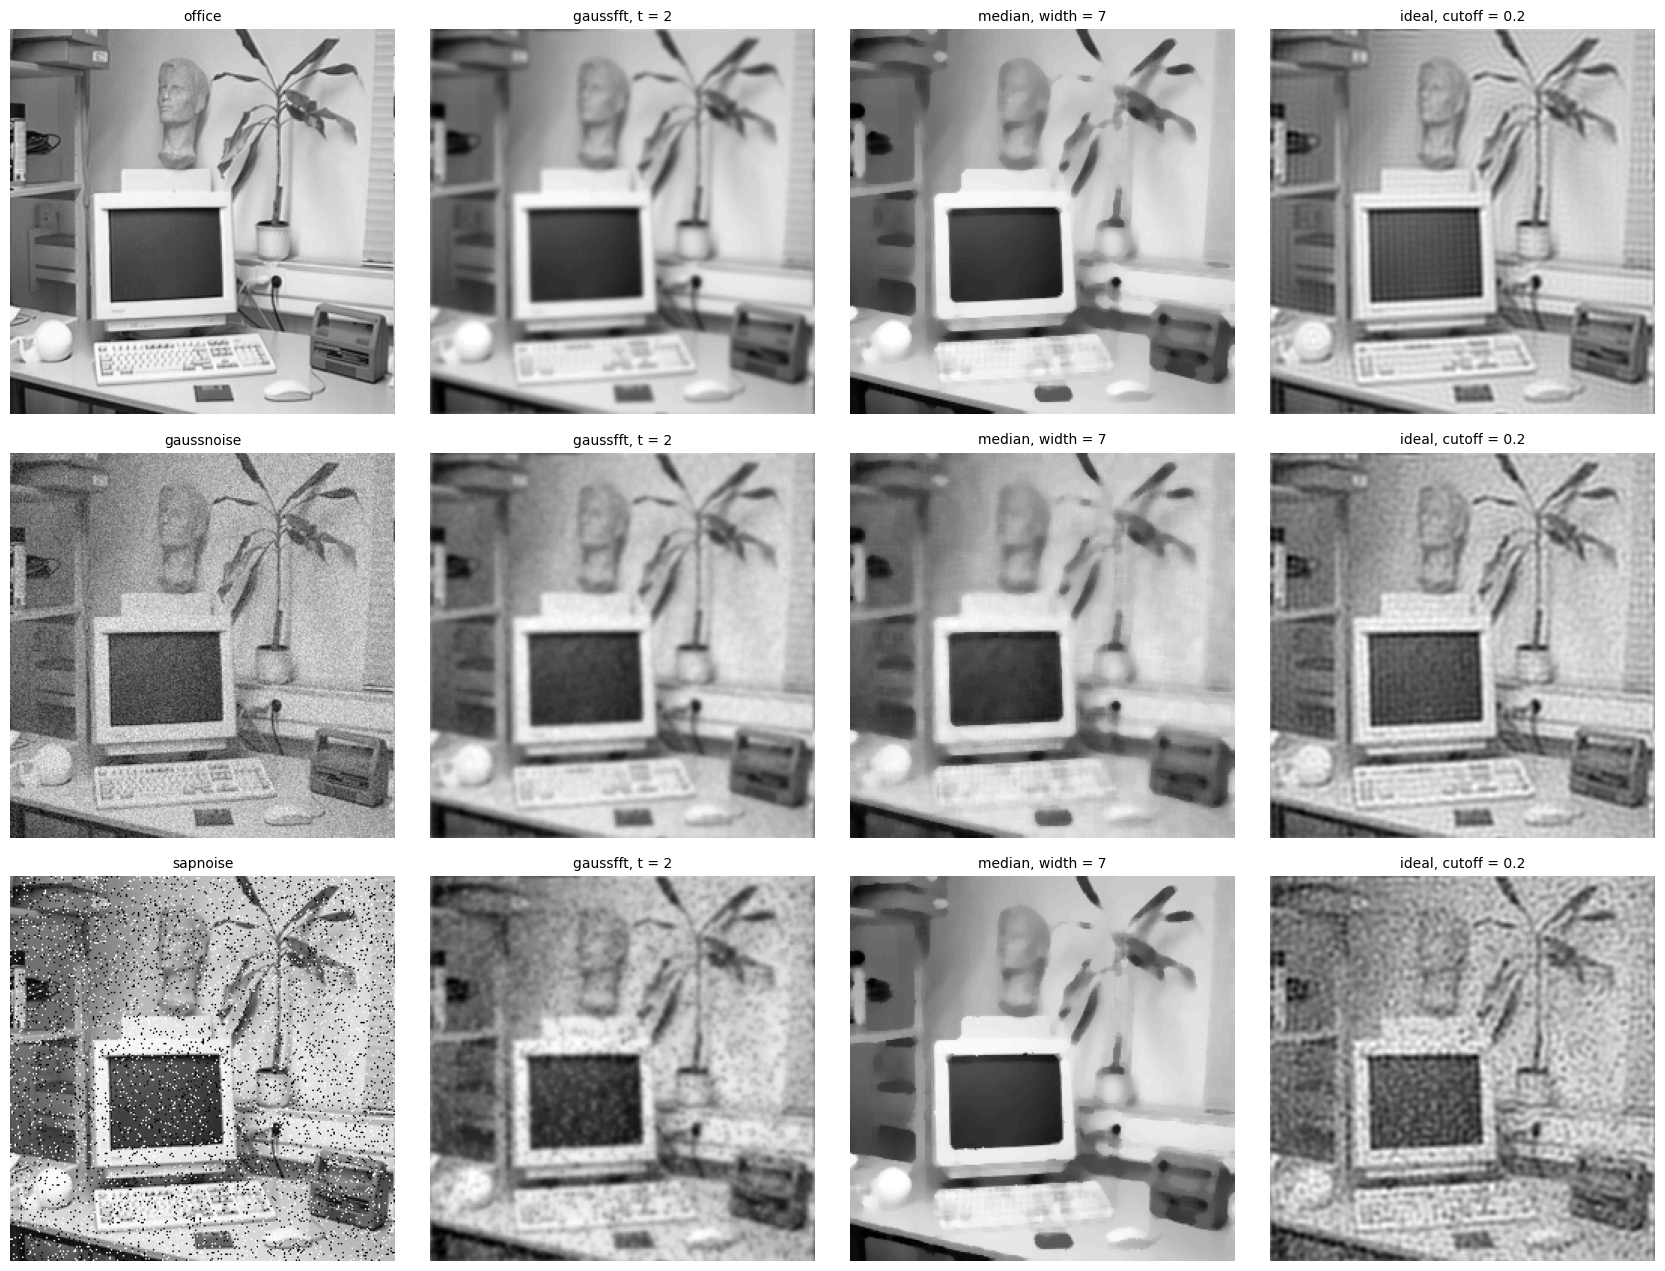

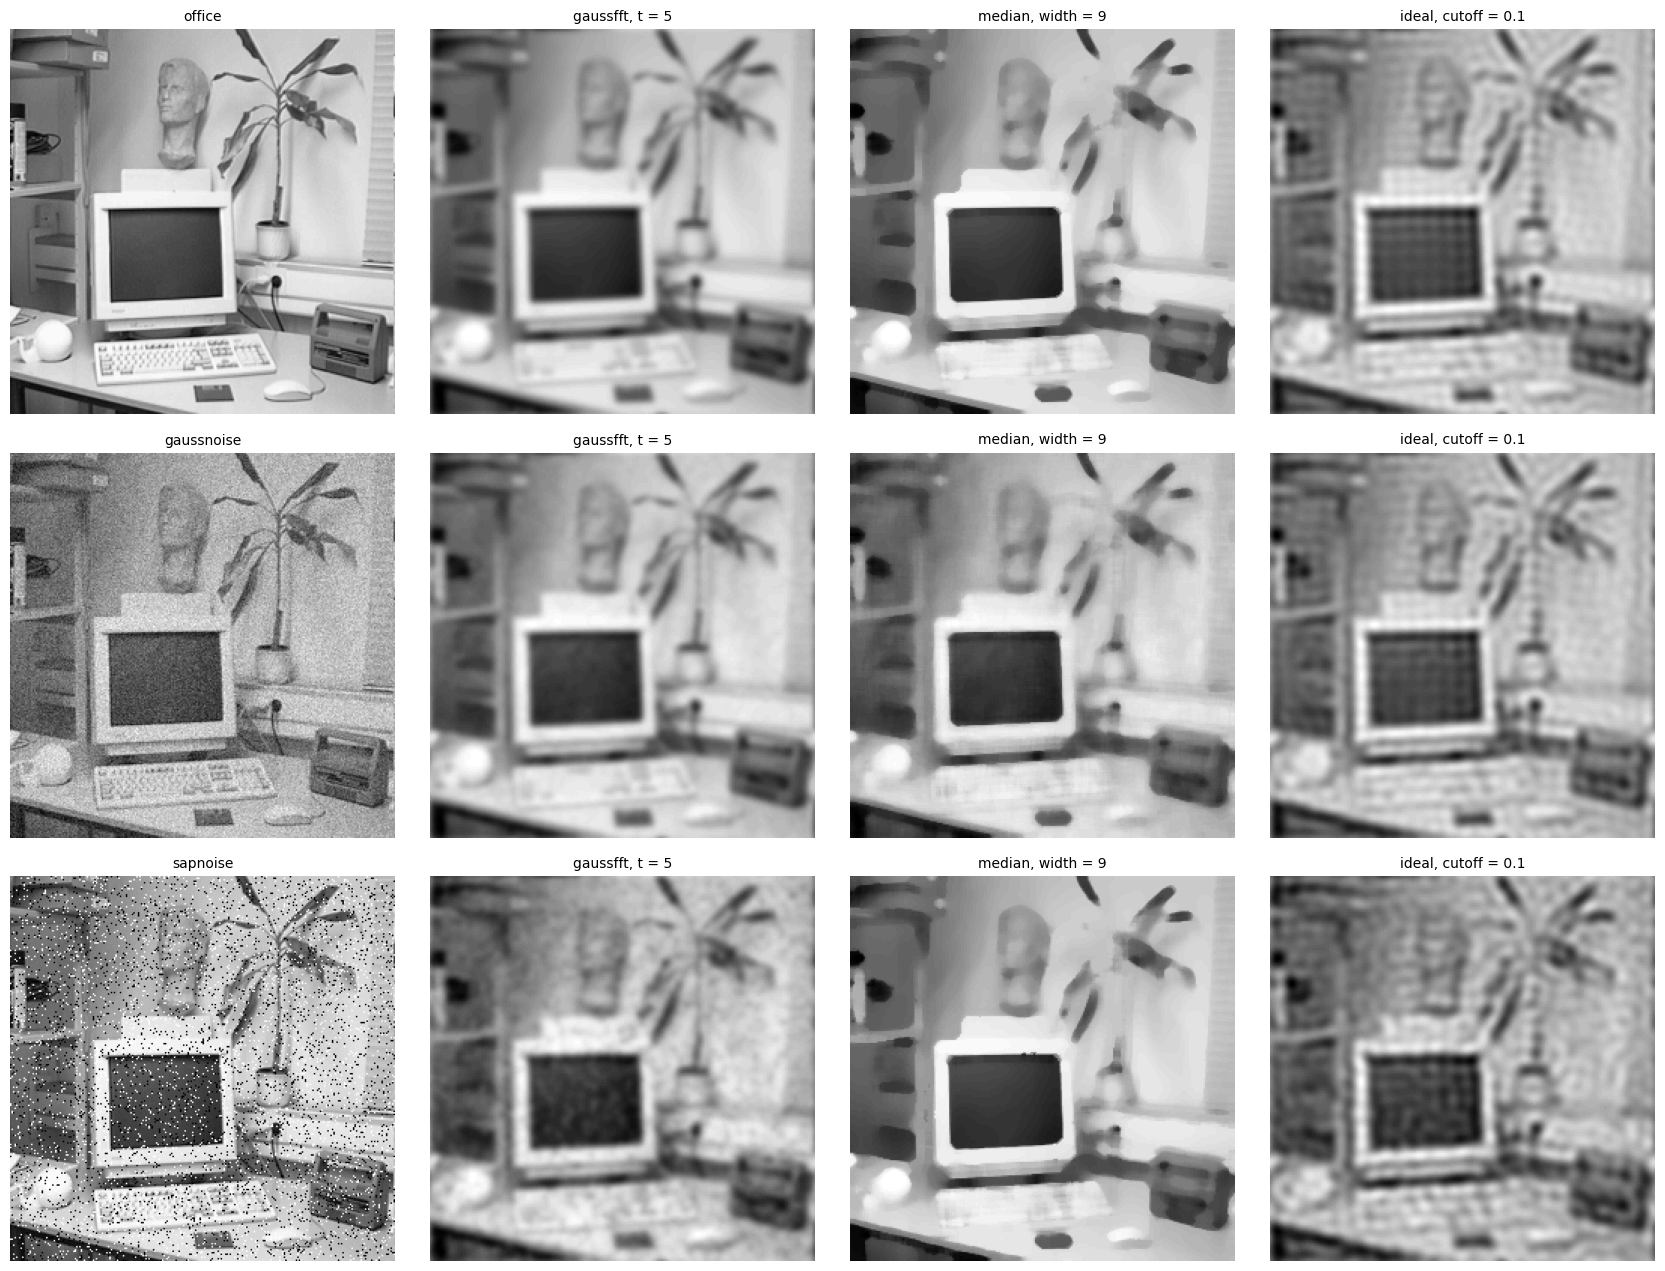

In [38]:

def task3_1(t, med_width, ideal_cutoff):
    f = plt.figure()
    f.set_size_inches(24,16)
    f.subplots_adjust(wspace=-0.3, hspace=0.1)
    a1 = f.add_subplot(3, 4, 1)
    a1.set_title('office')
    showgrey(office, display=False)
    a2 = f.add_subplot(3, 4, 2)
    a2.set_title('gaussfft, t = '+str(t))
    showgrey(gaussfft(office, t), display=False)
    a3 = f.add_subplot(3, 4, 3)
    a3.set_title('median, width = '+str(med_width))
    showgrey(medfilt(office,med_width), display=False)
    a4 = f.add_subplot(3, 4, 4)
    a4.set_title('ideal, cutoff = '+str(ideal_cutoff))
    showgrey(ideal(office, ideal_cutoff), display=False)
    a5 = f.add_subplot(3, 4, 5)
    a5.set_title('gaussnoise')
    showgrey(add, display=False)
    a6 = f.add_subplot(3, 4, 6)
    a6.set_title('gaussfft, t = '+str(t))
    showgrey(gaussfft(add, t), display=False)
    a7 = f.add_subplot(3, 4, 7)
    a7.set_title('median, width = '+str(med_width))
    showgrey(medfilt(add,med_width), display=False)
    a8 = f.add_subplot(3, 4, 8)
    a8.set_title('ideal, cutoff = '+str(ideal_cutoff))
    showgrey(ideal(add, ideal_cutoff), display=False)
    a9 = f.add_subplot(3, 4, 9)
    a9.set_title('sapnoise')
    showgrey(sap, display=False)
    a10 = f.add_subplot(3, 4, 10)
    a10.set_title('gaussfft, t = '+str(t))
    showgrey(gaussfft(sap, t), display=False)
    a11 = f.add_subplot(3, 4, 11)
    a11.set_title('median, width = '+str(med_width))
    showgrey(medfilt(sap,med_width), display=False)
    a12 = f.add_subplot(3, 4, 12)
    a12.set_title('ideal, cutoff = '+str(ideal_cutoff))
    showgrey(ideal(sap, ideal_cutoff), display=False)
    plt.show()

t_list = (0.1,0.5,1,2,5)
med_width_list = (2,3,5,7,9)
ideal_cutoff_list = (1,0.5,0.3,0.2,0.1)

for t, med_width, ideal_cutoff in zip(t_list, med_width_list, ideal_cutoff_list):
    task3_1(t, med_width, ideal_cutoff)


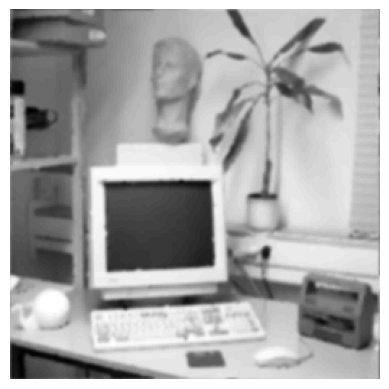

In [41]:
showgrey(gaussfft(medfilt(sap, 3), 1))

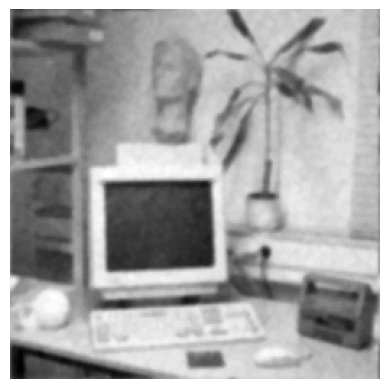

In [46]:
showgrey(medfilt(gaussfft(add, 2), 3))

### Exercise 3.2

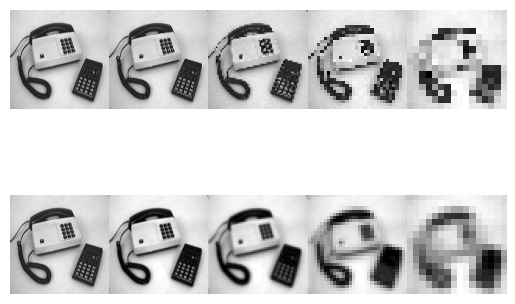

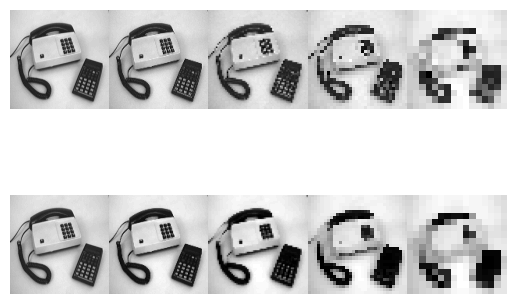

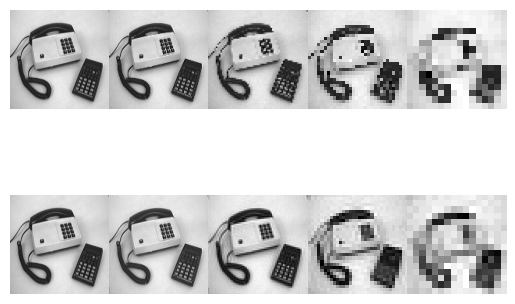

In [69]:
def fun(filter):
    img = np.load("Images-npy/phonecalc256.npy")
    smoothimg = img
    N=5
    f = plt.figure()
    f.subplots_adjust(wspace=0, hspace=0)
    for i in range(N):
        if i>0: # generate subsampled versions
            img = rawsubsample(img)
            smoothimg = filter(smoothimg)
            smoothimg = rawsubsample(smoothimg)
        f.add_subplot(2, N, i + 1)
        showgrey(img, False)
        f.add_subplot(2, N, i + N + 1)
        showgrey(smoothimg, False)
    plt.show()

fun(lambda img: gaussfft(img, 1))
fun(lambda img: medfilt(img, 3))
fun(lambda img: ideal(img, 0.3))

## Experiments

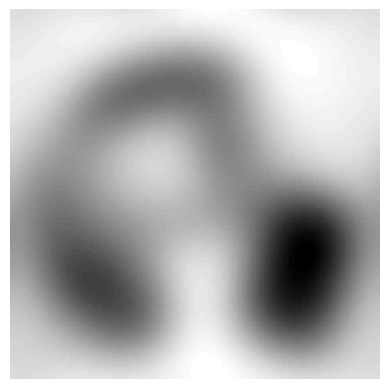

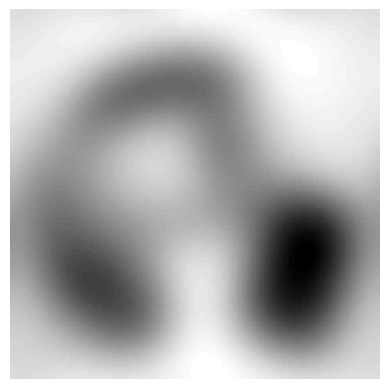

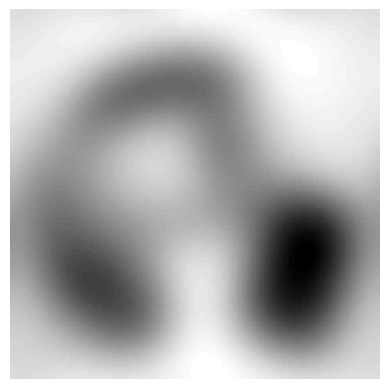

In [106]:
def repeated_gauss(img, t, N):
    for i in range(N):
        img = gaussfft(img, t)
    return img

showgrey(repeated_gauss(pic, 100, 1))
showgrey(repeated_gauss(pic, 10, 10))
showgrey(repeated_gauss(pic, 1, 100))